# Project: Wrangling and Analyze Data

# Project Motivation
## Context
My goal is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

The Data
In this project that we will work on the following three datasets.

### Enhanced Twitter Archive:
The first column contains each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo. There are 2356 tweets.

### Additional Data via the Twitter API:
Contains tweet ID, retweet count, and favorite count."

### Image Predictions File: 
Contains tweet_id, image_url, image_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog.


## Importing Labraries:

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt
import json

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive_df=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

### Downlaoding tweet image prediction programmaticly using the request library:

In [4]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

assert response.status_code==200
response.content

with open('image-predictions.tsv', mode= 'wb') as file:
    file.write(response.content)

In [5]:
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


### Importing josn library in order to conver the txt file into a data list for further analysis:

In [6]:
import json

tweet_json_dict = []
with open ('tweet-json.txt') as json_file:
    for line in json_file:
        tweet_json_dict.append(json.loads(line))

### Opening the txt file as dictinaries:

In [7]:
print(tweet_json_dict[12])

{'created_at': 'Tue Jul 25 01:55:32 +0000 2017', 'id': 889665388333682689, 'id_str': '889665388333682689', 'full_text': "Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm", 'truncated': False, 'display_text_range': [0, 106], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 889665366129029120, 'id_str': '889665366129029120', 'indices': [107, 130], 'media_url': 'http://pbs.twimg.com/media/DFi579UWsAAatzw.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg', 'url': 'https://t.co/BxvuXk0UCm', 'display_url': 'pic.twitter.com/BxvuXk0UCm', 'expanded_url': 'https://twitter.com/dog_rates/status/889665388333682689/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 544, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1080, 'h': 1350, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 960, 'h': 1200, 'resize': 'fit'}}}]}, 'e

### Creating dataframe using tweet_json_dict in order to get the  tweet ID, retweet count, and favorite count columns in a DataFrame:

In [8]:
tweet_data_df = pd.DataFrame(tweet_json_dict)

In [9]:
tweet_data_df.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

In [10]:
tweet_data_df = tweet_data_df[['id','retweet_count', 'favorite_count']]

#### Checking the first 5 Rows of the "tweet_data_df"

In [11]:
tweet_data_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### Saving dataframe to a CSV File:

In [12]:
tweet_data_df.to_csv('tweet_data_df.csv',index=False)

#### Opening datafarme of "tweet_data_df" after saving it:

In [13]:
tweet_data_df = pd.read_csv('tweet_data_df.csv')
tweet_data_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### Chaning the name of the id columns into "tweet_id":

In [14]:
tweet_data_df.rename(columns={'id':'tweet_id'},inplace=True)

In [15]:
tweet_data_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### Saving the dataframe to a CSV File after changing the id column :

In [16]:
tweet_data_df.to_csv('tweet_data_df.csv',index=False)

In [17]:
tweet_data_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### 1- Enhanced Twitter Archive:

#### Displaying the first 5 rows:

In [18]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Checking the data type using info method:

In [19]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Checking the columns and rows:

In [20]:
twitter_archive_df.shape

(2356, 17)

#### Displaying the total of null vlaues:

In [21]:
twitter_archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

#### Checking if there is any duplicates:

In [22]:
twitter_archive_df.duplicated().sum()

0

#### Displaying the summary of "rating_denominator"!

In [23]:
twitter_archive_df.describe()['rating_denominator']

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

#### Checking how many tweets with rating_denominator that are greater than 10

In [24]:
twitter_archive_df[twitter_archive_df['rating_denominator']>10].count()['rating_numerator']

20

#### Checking How many tweets with rating_denominator that are equal 10

In [25]:
twitter_archive_df[twitter_archive_df['rating_denominator']==10].count()['rating_numerator']

2333

#### Checking How many tweets with rating_denominator that are not equal 10

In [26]:
twitter_archive_df[twitter_archive_df['rating_denominator']!=10].count()['rating_numerator']

23

#### Checking How many tweets with rating_denominator that are less than 10

In [27]:
twitter_archive_df[twitter_archive_df['rating_numerator']<10].count()['rating_denominator']

440

#### Here, we are diplaying examples of a text_tweet that has rating_denominator greater than 10

In [28]:
twitter_archive_df[twitter_archive_df['rating_denominator']>10].head()[['tweet_id','text','rating_denominator']]

,tweet_id,text,rating_denominator
342,832088576586297345,@docmisterio account started on 11/15/15,15
433,820690176645140481,The floofs have been released I repeat the flo...,70
784,775096608509886464,"RT @dog_rates: After so many requests, this is...",11
902,758467244762497024,Why does this never happen at my front door......,150
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",11


#### Here are some rating numerator with "Zero"

In [29]:
twitter_archive_df[twitter_archive_df['rating_denominator']==0].head()[['tweet_id','text','rating_numerator']]

,tweet_id,text,rating_numerator
313,835246439529840640,@jonnysun @Lin_Manuel ok jomny I know you're e...,960


In [30]:
twitter_archive_df['retweeted_status_id'].count()

181

#### Here, we are counting how many values with wrong structure regarding the name: 

In [31]:
twitter_archive_df['name'].value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Penny         10
Lola          10
Tucker        10
Bo             9
Winston        9
the            8
Sadie          8
Toby           7
Buddy          7
Bailey         7
Daisy          7
an             7
Leo            6
Dave           6
Rusty          6
Scout          6
Bella          6
Koda           6
Oscar          6
Stanley        6
Milo           6
Jack           6
Jax            6
Bentley        5
            ... 
Noosh          1
Dex            1
Willem         1
Jeremy         1
Corey          1
Hero           1
Molly          1
Jangle         1
Kane           1
Burt           1
Josep          1
Gerbald        1
Sweets         1
Rinna          1
Shadoe         1
Damon          1
Peanut         1
Jonah          1
Harvey         1
Hamrick        1
Charleson      1
Cupid          1
Pupcasso       1
Franq          1
Jeffrie        1
Sparky         1
Cuddles        1
Tessa         

### 2- Additional Data via the Twitter API:

In [32]:
tweet_data_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [33]:
tweet_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [34]:
tweet_data_df.shape

(2354, 3)

In [35]:
tweet_data_df.duplicated().sum()

0

In [36]:
tweet_data_df.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [37]:
tweet_data_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [38]:
tweet_data_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


#### Number of Missing IDs:

In [39]:
2356 - 2354

2

### 3- Image Predictions File:

#### Displaying Image Prediction files using tab seperated values:

In [40]:
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

#### Getting sample of data:

In [41]:
image_prediction.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
443,674638615994089473,https://pbs.twimg.com/media/CVzMPh1UsAELQ_p.jpg,1,Pomeranian,0.846986,True,chow,0.142014,True,keeshond,0.002605,True
1865,843235543001513987,https://pbs.twimg.com/media/C7PGQJAWwAAibui.jpg,1,Pembroke,0.958452,True,Cardigan,0.023770,True,Chihuahua,0.005269,True
1768,827199976799354881,https://pbs.twimg.com/media/C3rN-lcWEAA9CmR.jpg,4,Great_Dane,0.869681,True,American_Staffordshire_terrier,0.026658,True,boxer,0.019866,True
1525,788412144018661376,https://pbs.twimg.com/media/CvEAqQoWgAADj5K.jpg,1,golden_retriever,0.805238,True,Labrador_retriever,0.113798,True,Brittany_spaniel,0.038559,True
1580,796387464403357696,https://pbs.twimg.com/media/Cw1WKu1UQAAvWsu.jpg,1,Pekinese,0.461164,True,Pomeranian,0.288650,True,Siamese_cat,0.052423,False
1834,836989968035819520,https://pbs.twimg.com/media/C52V7PzWcAA_pVv.jpg,1,shopping_cart,0.572422,False,shopping_basket,0.414002,False,toy_poodle,0.005887,True
1477,780543529827336192,https://pbs.twimg.com/media/CtUMLzRXgAAbZK5.jpg,1,golden_retriever,0.628312,True,Labrador_retriever,0.317365,True,Tibetan_mastiff,0.012260,True
1994,874057562936811520,https://pbs.twimg.com/media/DCFGtdoXkAEsqIw.jpg,1,flat-coated_retriever,0.832177,True,black-and-tan_coonhound,0.040437,True,Newfoundland,0.028228,True
1766,826848821049180160,https://pbs.twimg.com/media/C3mOnZ_XUAAjr2V.jpg,4,Great_Pyrenees,0.858764,True,golden_retriever,0.023526,True,Pekinese,0.017104,True
1511,786233965241827333,https://pbs.twimg.com/media/CulDnZpWcAAGbZ-.jpg,1,Labrador_retriever,0.478193,True,schipperke,0.224817,True,Staffordshire_bullterrier,0.077396,True


#### Checkig how many rows and columns:

In [42]:
image_prediction.shape

(2075, 12)

#### 2075 entries as shown below:

In [43]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Number of Unique img_num:

In [44]:
image_prediction.img_num.unique()

array([1, 4, 2, 3])

#### Number of value count for each img_number:

In [45]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

#### Number of Url duplicate: 

In [46]:
image_prediction.jpg_url.duplicated().sum()

66

In [47]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Taking a look of how this photo looks like:

In [48]:
image_prediction.loc[744,'jpg_url']

'https://pbs.twimg.com/media/CYpsFmIWAAAYh9C.jpg'

In [49]:
from IPython.display import Image
Image(url='https://pbs.twimg.com/media/CYpsFmIWAAAYh9C.jpg')

In [50]:
tweet_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [51]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [52]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Quality issues

#### Enhanced Twitter Archive:
1. Some dog has an invalid name such as "a, an, None, etc")

2. Data type of tweet_id is invalid (int instead of object or str).

3. row number of 315 & 1016 have Zero numerator.

4. 20 rating_denominator greater than 10.

5. 23 rating_denominator not equal 10.

6. 181 retweets as indicated by "retweeted_status_id".

7. Invalid timestamp dtype which is (string not datatime).




#### Additional Data via the Twitter API:
1. Two missing IDs ( 2356 - 2354)


#### Image Predictions File:

1. In columns p1,p2,and p3:underscores are used in some words instead of spaces.

2. Also,in columns p1,p2,and p3: some values start with uppercase letter and some start with lowecase.



### Tidiness issues
1. All three data above are relevant.However, they are separated into three dataset named as "image_prediction, tweet_data_df,twitter_archive_df". 


2. Dogs stage data is separated into 4 columns including:doggo, floofer, pupper, puppo.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

### Creating copies from the original data before cleaning:

##### Making copies of original pieces of data

In [53]:
#Taking copy of the additional Data via the Twitter API
tweet_data_df_copy = tweet_data_df.copy()

In [54]:
# Taking copy of the Enhanced Twitter Archive
twitter_archive_df_copy = twitter_archive_df.copy()

In [55]:
#- Taking copy of the Image Predictions File
image_prediction_copy = image_prediction.copy()

### Issue #1:

##### Tidiness issues

1- Dog stage data is seperated into four columns:

#### Define:

Merging the four columns into one column as shown below:

#### Code

Here, we are extracting dog stages from text columns into a new column named "dog_stages"

In [56]:
twitter_archive_df_copy['dog_stages'] = twitter_archive_df_copy['text'].str.extract('(floofer|pupper|doggo|puppo)')

In [57]:
twitter_archive_df_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN


#### Dropping unnecessary column:

In [58]:
twitter_archive_df_copy = twitter_archive_df_copy.drop(columns=['doggo','floofer','pupper','puppo'])

#### Test

In [59]:
twitter_archive_df_copy['dog_stages'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stages, dtype: int64

### Issue #2:

2- All three data are relevant, but they are seperated.

#### Define

Merging all data together based on one column named "tweet_id"

#### Code

#### First stpe is merging data of "twitter_archive_df_copy" and "tweet_data_df_copy"

In [60]:
twitter_archive_df_copy = pd.merge(twitter_archive_df_copy,tweet_data_df_copy, on='tweet_id',how='left')

#### Second stpe is merging data of "twitter_archive_df_copy" and "tweet_data_df_copy"

In [61]:
twitter_archive_df_copy = pd.merge(twitter_archive_df_copy,image_prediction_copy, on='tweet_id',how='left')

#### Test

In [62]:
twitter_archive_df_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [63]:
twitter_archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stages                    399 non-null object
retweet_count                 2354 non-null float64
favorite_count                2354 non-null float64
jpg_url                       2075 non-null object
img_num                       2

### Cleaning Some Quality Issues:(1)



1 - 181 retweet that are indicated by retweeted_status_id:

#### Define:
    
since there are 181 retweet that are indicated by retweeted_status_i, we will delete rows that represent retweet and some related columns:    

In [64]:
twitter_archive_df_copy =twitter_archive_df_copy[twitter_archive_df_copy['retweeted_status_id'].isnull()] 

In [65]:
twitter_archive_df_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [66]:
twitter_archive_df_copy = twitter_archive_df_copy.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])

In [67]:
twitter_archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stages               364 non-null object
retweet_count            2175 non-null float64
favorite_count           2175 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf              

### Cleaning Some Quality Issues:(2)

2- Some dog has an invalid name such as "a, an, None, etc")

#### Define

In [68]:
### Converting an invalid names:

In [69]:
twitter_archive_df_copy['name'] = twitter_archive_df_copy['name'].replace(regex=['^[a-z]+', 'None'],value=np.nan)

In [70]:
twitter_archive_df_copy['name'].head()

0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
Name: name, dtype: object

#### How many null values in name column:

In [71]:
sum(twitter_archive_df_copy['name'].isnull())

784

#### Creating a function for extracting names from text column. Then retuurn nan if there is no word's name:

In [72]:
def fun(text):
    text_list = text.split()
    for w in text_list:
        if w.lower() =='named':
            names_index = text_list.index(w) + 1
            return text_list[names_index]
        else:
            pass
    return np.nan

In [73]:
twitter_archive_df_copy['name'] = np.where(twitter_archive_df_copy['name'].isnull(), twitter_archive_df_copy['text'].apply(fun),twitter_archive_df_copy['name'])

### Test

In [74]:
sum(twitter_archive_df_copy['name'].isnull())

761

### Cleaning Some Quality Issues: (3)

3- Data type of tweet_id is invalid (int instead of object or str).

### Define

Changing data type of "tweet_id" column into string

### Code

In [75]:
twitter_archive_df_copy['tweet_id'] = twitter_archive_df_copy['tweet_id'].astype(str)

### Test

In [76]:
twitter_archive_df_copy['tweet_id'].head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: object

### Cleaning Some Quality Issues: (4)

Invalid timestamp dtype from string not datatime.

### Define

Changing data type of "timestamp" column into datatime

### Code

In [77]:
twitter_archive_df_copy['timestamp'] = pd.to_datetime(twitter_archive_df_copy['timestamp'])

### Test

In [78]:
twitter_archive_df_copy['timestamp'].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

### Cleaning Some Quality Issues: (5)

Missing photos for some IDs like 2356  & 2354

### Define

Removing rows with missing photos:

### Code

In [79]:
twitter_archive_df_copy = twitter_archive_df_copy[twitter_archive_df_copy['jpg_url'].notnull()]

### Test

In [80]:
twitter_archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1373 non-null object
dog_stages               326 non-null object
retweet_count            1994 non-null float64
favorite_count           1994 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf     

### Cleaning Some Quality Issues: (6)

In columns p1,p2,and p3:underscores are used in some words instead of spaces.

### Define

Replacing nderscores to spaces:

### Code

In [81]:
twitter_archive_df_copy['p1'] = twitter_archive_df_copy['p1'].str.replace('_',' ')
twitter_archive_df_copy['p2'] = twitter_archive_df_copy['p2'].str.replace('_',' ')
twitter_archive_df_copy['p3'] = twitter_archive_df_copy['p3'].str.replace('_',' ')

### Test

In [82]:
twitter_archive_df_copy[['p1','p2','p3']].tail()

,p1,p2,p3
2351,miniature pinscher,Rottweiler,Doberman
2352,Rhodesian ridgeback,redbone,miniature pinscher
2353,German shepherd,malinois,bloodhound
2354,redbone,miniature pinscher,Rhodesian ridgeback
2355,Welsh springer spaniel,collie,Shetland sheepdog


### Cleaning Some Quality Issues: (7)

Columns like p1,p2,and p3 has values start with uppercase letter and some start with lowecase.

### Define

Changing lowercase into uppercase letter

### Code

In [83]:
twitter_archive_df_copy['p1'] = twitter_archive_df_copy['p1'].str.title()
twitter_archive_df_copy['p2'] = twitter_archive_df_copy['p2'].str.title()
twitter_archive_df_copy['p3'] = twitter_archive_df_copy['p3'].str.title()

### Test

In [84]:
twitter_archive_df_copy[['p1','p2','p3']].tail()

,p1,p2,p3
2351,Miniature Pinscher,Rottweiler,Doberman
2352,Rhodesian Ridgeback,Redbone,Miniature Pinscher
2353,German Shepherd,Malinois,Bloodhound
2354,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2355,Welsh Springer Spaniel,Collie,Shetland Sheepdog


### Cleaning Some Quality Issues: (8)

Rows number 313 has Zero numerator.

### Define

Removing row number of 315 & 1016 that has Zero numerator.

In [85]:
twitter_archive_df_copy[twitter_archive_df_copy['rating_numerator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,NaN,...,3.0,Swing,0.967066,False,American Staffordshire Terrier,0.012731,True,Staffordshire Bullterrier,0.007039,True
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",https://twitter.com/dog_rates/status/746906459...,0,10,NaN,...,1.0,Traffic Light,0.470708,False,Fountain,0.199776,False,Space Shuttle,0.064807,False


### Code

In [86]:
twitter_archive_df_copy = twitter_archive_df_copy[twitter_archive_df_copy['rating_numerator']!=0]

### Test

In [87]:
twitter_archive_df_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,1.0,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,2.0,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [173]:
twitter_archive_df_copy.to_csv('twitter_archive_master.csv')

## Data Analysis and Visualization

In [174]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [175]:
twitter_archive_master.head()

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,...,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,...,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,...,1.0,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,...,2.0,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


### Removing Unnamed column:
Reference:

https://linuxhint.com/pandas-remove-unnamed-columns/


In [176]:
twitter_archive_master =twitter_archive_master.drop("Unnamed: 0", axis=1)

In [177]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,1.0,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,2.0,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


### Insights:

1. Pupper dog has the highest total number while floofer has the lowest number:


2. Pupper dog has the highest total number compared to other:


3. Rating_numerator of "12" has the highest total number:



### Visualization

#### Displaying total number of each dog stages:

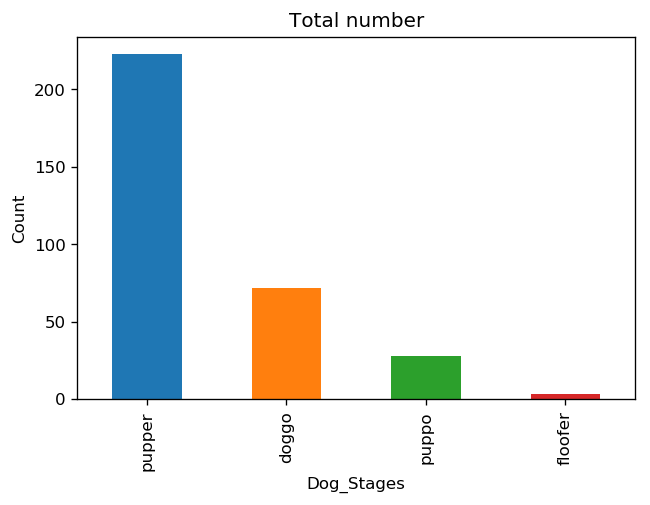

In [179]:
plt.figure(figsize=(6,4),dpi=120)
twitter_archive_master['dog_stages'].value_counts().plot(kind='bar')
plt.title ('Total number')
plt.xlabel ('Dog_Stages')
plt.ylabel ('Count');

#### Dsiplaying the relationshipe between retweet_count and favorite count:

As shown below there is linear relationship between between retweet_count and favorite count

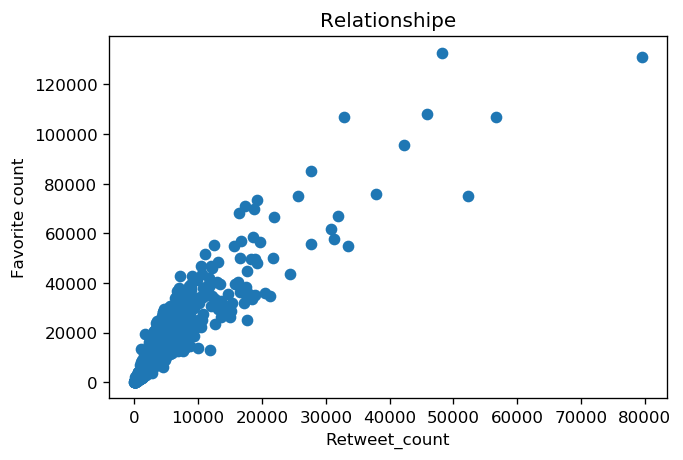

In [180]:
plt.figure(figsize=(6,4),dpi=120)
plt.scatter(twitter_archive_master['retweet_count'], twitter_archive_master['favorite_count'])
plt.title ('Relationshipe')
plt.xlabel ('Retweet_count')
plt.ylabel ('Favorite count');

#### Dsiplaying the total number of rating_numerator:

Rating_numerator of "12" has the highest total number:

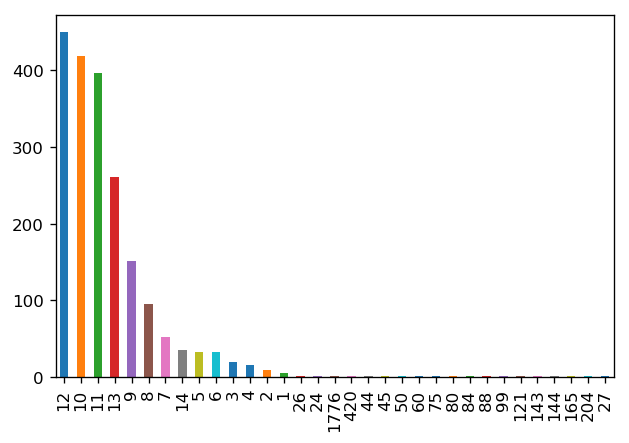

In [181]:
plt.figure(figsize=(6,4),dpi=120)
twitter_archive_master['rating_numerator'].value_counts().plot(kind='bar');